# **Actividad 1.**
**Crea un nuevo cuaderno de trabajo de Jupyter llamado Actividad4.ipynb en Google Colab.**

**Por favor, resume en una sola celda todas las funciones que aplicaste al DataFrame inicial y que concluya con la creación de un nuevo DataFrame para continuar con nuestro trabajo.**

**Se pide sintetizar las características principales del conjunto de datos que estas analizando, aplicando la siguiente secuencia de funciones de un proceso EDA arriba mencionadas.**

En los datos climatológicos con los que hemos trabajado anteriormente, podemos mencionar que hubo demasiados datos nulos en la columna de evaporación.

Tuvimos que realizar un dataframe con los datos, cambiando un poco los datos para que se ajusten a una lectura de datos fáciles de interpretar para Python. Entonces, realizamos varias impresiones de los datos para observar cuales cambios son los que realizaremos para el desarrollo de la actividad, entre ellos:\
-Vimos las características.\
-Vimos el contenido el dataframe.\
-Creamos una copia de seguridad.\
-Agregamos un Loop a las columnas que nos interesaban que fueran números flotantes.\
-Vimos los datos nulos que habia en las columnas y donde se nos presentaorn más numeros nulos es en la evaporación.\
-Pedimos una descripción de los datos con 4 cifras significativas.\
-Los datos de las fechas las realizamos de tal forma para que se detectara en Python como un dato tipo fecha.\
-Al final, pedimos la información para ver que los datos que tenemos están como pedimos.\
-Con los datos, vemos que tienden a ser más presentes durante la segunda mitad del año. Ahí es donde realmente veremos algunos datos interesantes e interpretables.

In [2]:
#Importamos las bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#Agregamos los cambios hecho en la actividad 3 de nuestro data frame de forma resumida, para tenerlo listo para la actividad.
url = 'https://raw.githubusercontent.com/MarioMtzC99/FisicaComputacional1/main/Actividad1/DatosClimatolog%C3%ADaPitiquito.txt'
mis_columnas = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_carac = pd.read_csv(url, names=mis_columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
df_work = df_carac.copy()
str_Nulo = 'Nulo'
df_trabajo = df_work.replace(to_replace=str_Nulo, value='', regex=True)
#Definimos la variable que  tendrá las columnas que queremos cambiar.
columnas_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
#Agregamos un Loop para que los datos de las columnas sean numeros flotantes.
for columnas in columnas_list:
  df_trabajo[columnas] = pd.to_numeric(df_trabajo[columnas], errors='coerce')
#Realizamos una copia nueva para no perder el dataframe.
df_paso4 = df_trabajo.copy()
#Lo que hacemos es establecer una copia del cambio de la fecha con ayuda de
#pd.to_datetime.
#Definimos que queremos que la nueva copia cambie la Fecha, considerando el día como lo primero que debe aparecer.
df_paso4['Fecha']=pd.to_datetime(df_paso4['Fecha'], dayfirst=True).copy()
#Definimos Año y Mes para separar la fechas.
df_paso4['Año'] = df_paso4['Fecha'].dt.year
df_paso4['Mes'] = df_paso4['Fecha'].dt.month
#Verificamos que son del tipo que deseamos.
df_paso4.info()
print(df_paso4.head())
print(df_paso4.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21585 entries, 0 to 21584
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21585 non-null  datetime64[ns]
 1   Precip  21536 non-null  float64       
 2   Evap    14380 non-null  float64       
 3   Tmax    21528 non-null  float64       
 4   Tmin    21529 non-null  float64       
 5   Año     21585 non-null  int64         
 6   Mes     21585 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1952-07-01     0.0   NaN  42.0  22.0  1952    7
1 1952-07-02     0.0   NaN  42.5  25.0  1952    7
2 1952-07-03     0.0   NaN  43.0  25.5  1952    7
3 1952-07-04     0.0   NaN  44.0  27.5  1952    7
4 1952-07-05     0.0   NaN  43.5  25.5  1952    7
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
21580 2015-12-27     0.0   NaN  16.0  -4.0  2015   12
21581 2015-12-28   

In [6]:
#Cambiaremos la columna de mes a cadena de caracteres con la función
#strftime('%b') para que nos escriba que mes es en vez de colocarnos el num.
df_EDA = df_paso4.copy()

In [7]:
df_EDA.drop('Mes', axis=1, inplace=True)
df_EDA['Mes'] = df_EDA['Fecha'].dt.strftime('%b')
df_EDA.info()
print(df_EDA.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21585 entries, 0 to 21584
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21585 non-null  datetime64[ns]
 1   Precip  21536 non-null  float64       
 2   Evap    14380 non-null  float64       
 3   Tmax    21528 non-null  float64       
 4   Tmin    21529 non-null  float64       
 5   Año     21585 non-null  int64         
 6   Mes     21585 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.2+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1952-07-01     0.0   NaN  42.0  22.0  1952  Jul
1 1952-07-02     0.0   NaN  42.5  25.0  1952  Jul
2 1952-07-03     0.0   NaN  43.0  25.5  1952  Jul
3 1952-07-04     0.0   NaN  44.0  27.5  1952  Jul
4 1952-07-05     0.0   NaN  43.5  25.5  1952  Jul


# **Actividad 2.**
**Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())**

**Temperatura máxima.**

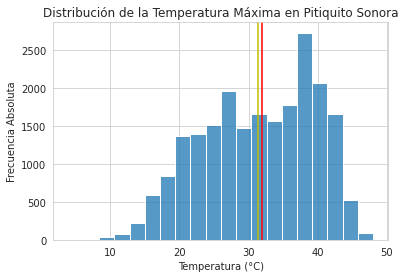

In [8]:
#Graficando la Temperatura Máxima.
sns.set_style("whitegrid")
#Ingresamos las cantidades promedio y mediana.
Tmed = df_EDA.Tmax.median()
Tprom = df_EDA.Tmax.mean()
#Realizamos los histogramas con seaborn.
sns.histplot(data=df_EDA, x='Tmax', bins=20);
plt.axvline(x = Tmed, color = 'r', label = 'm')
plt.axvline(x = Tprom, color = 'y', label = 'x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Pitiquito Sonora')
plt.show()

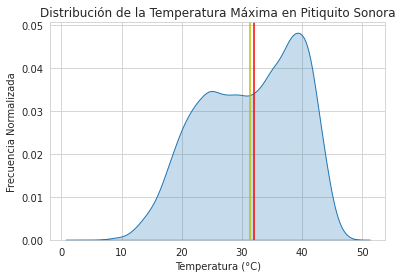

In [9]:
#Ahora realizamos la gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_EDA.Tmax, fill=True);
plt.axvline(Tmed, color = 'r');
plt.axvline(Tprom, color = 'y');
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Pitiquito Sonora')
plt.show()

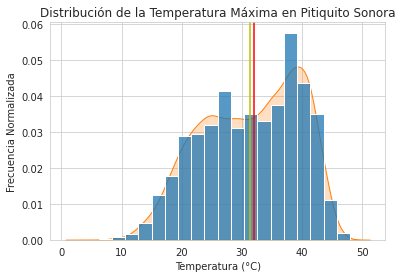

In [10]:
#Observamos las dos distribuciones anteriores sobrepuestas.
sns.set_style("whitegrid")
sns.histplot(data=df_EDA, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_EDA.Tmax, fill=True);
plt.axvline(Tmed, color = 'r');
plt.axvline(Tprom, color = 'y');
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Pitiquito Sonora')
plt.show()

**Temperatura mínima.**









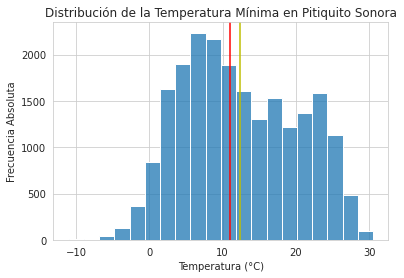

In [11]:
#Graficando la Temperatura Mínima.
sns.set_style("whitegrid")
#Ingresamos las cantidades promedio y mediana.
Tmed = df_EDA.Tmin.median()
Tprom = df_EDA.Tmin.mean()
#Realizamos los histogramas con seaborn.
sns.histplot(data=df_EDA, x='Tmin', bins=20);
plt.axvline(x = Tmed, color = 'r', label = 'm')
plt.axvline(x = Tprom, color = 'y', label = 'x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Pitiquito Sonora')
plt.show()

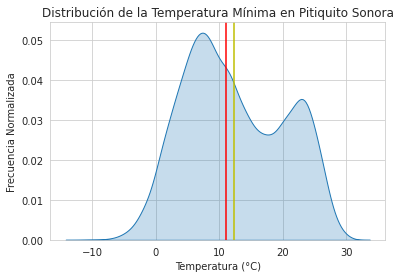

In [12]:
#Ahora realizamos la gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_EDA.Tmin, fill=True);
plt.axvline(Tmed, color = 'r');
plt.axvline(Tprom, color = 'y');
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Pitiquito Sonora')
plt.show()

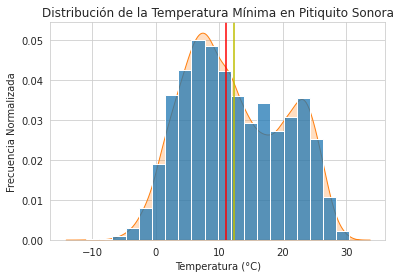

In [13]:
#Observamos las dos distribuciones anteriores sobrepuestas.
sns.set_style("whitegrid")
sns.histplot(data=df_EDA, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_EDA.Tmin, fill=True);
plt.axvline(Tmed, color = 'r');
plt.axvline(Tprom, color = 'y');
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Pitiquito Sonora')
plt.show()

**Evaporación.**

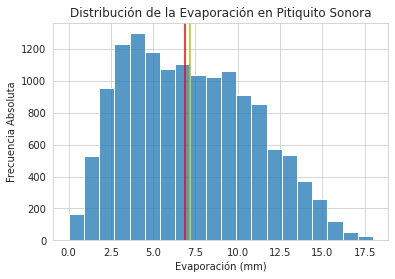

In [14]:
#Graficando la Evaporación.
sns.set_style("whitegrid")
#Ingresamos las cantidades promedio y mediana.
Evmed = df_EDA.Evap.median()
Evprom = df_EDA.Evap.mean()
#Realizamos los histogramas con seaborn.
sns.histplot(data=df_EDA, x='Evap', bins=20);
plt.axvline(x = Evmed, color = 'r', label = 'm')
plt.axvline(x = Evprom, color = 'y', label = 'x')

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Evaporación en Pitiquito Sonora')
plt.show()

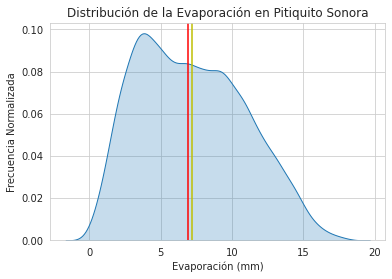

In [15]:
#Ahora realizamos la gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_EDA.Evap, fill=True);
plt.axvline(Evmed, color = 'r');
plt.axvline(Evprom, color = 'y');
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Evaporación en Pitiquito Sonora')
plt.show()

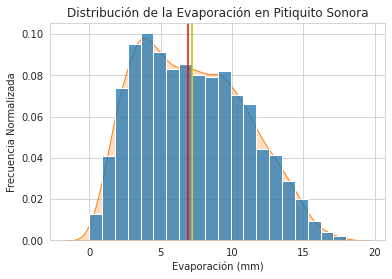

In [16]:
#Observamos las dos distribuciones anteriores sobrepuestas.
sns.set_style("whitegrid")
sns.histplot(data=df_EDA, x='Evap', bins=20, stat='density');
sns.kdeplot(df_EDA.Evap, fill=True);
plt.axvline(Evmed, color = 'r');
plt.axvline(Evprom, color = 'y');
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución de la Evaporación en Pitiquito Sonora')
plt.show()

# **Actividad 3.**
**Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima (Función: sns.boxplot())**

**Temperatura Máxima.**

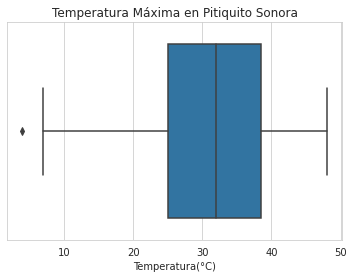

In [17]:
sns.set_style("whitegrid")
sns.boxplot(x=df_EDA.Tmax, data=df_EDA, orient='h').set(xlabel='Temperatura(°C)',
title='Temperatura Máxima en Pitiquito Sonora');

**Temperatura Mínima.**

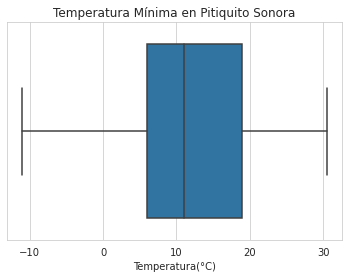

In [18]:
sns.boxplot(x=df_EDA.Tmin, data=df_EDA, orient='h').set(xlabel='Temperatura(°C)',
title='Temperatura Mínima en Pitiquito Sonora');

**Evaporación.**

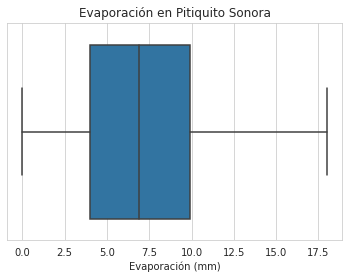

In [19]:
sns.boxplot(x=df_EDA.Evap, data=df_EDA, orient='h').set(xlabel='Evaporación (mm)',
title='Evaporación en Pitiquito Sonora');

# **Actividad 4.**
**Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses (Función: sns.barplot())**

In [20]:
print(df_EDA.head())

       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1952-07-01     0.0   NaN  42.0  22.0  1952  Jul
1 1952-07-02     0.0   NaN  42.5  25.0  1952  Jul
2 1952-07-03     0.0   NaN  43.0  25.5  1952  Jul
3 1952-07-04     0.0   NaN  44.0  27.5  1952  Jul
4 1952-07-05     0.0   NaN  43.5  25.5  1952  Jul


In [21]:
print(df_EDA.tail())

           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
21580 2015-12-27     0.0   NaN  16.0  -4.0  2015  Dec
21581 2015-12-28     0.0   NaN  15.0  -4.0  2015  Dec
21582 2015-12-29     0.0   NaN  15.0  -2.5  2015  Dec
21583 2015-12-30     0.0   NaN  16.0  -3.0  2015  Dec
21584 2015-12-31     0.0   NaN  14.0  -1.0  2015  Dec


In [25]:
#Como comenzamos en 1952, entonces seleccionamos datos a partir de ahi.
#Lo más óptimo es de 21 datos a partir de 1952, para recolectar todos.
df_52 = df_EDA[(df_EDA['Año'] >= 1952) & (df_EDA['Año'] < 1973)]
df_73 = df_EDA[(df_EDA['Año'] >= 1973) & (df_EDA['Año'] < 1994)]
df_94 = df_EDA[(df_EDA['Año'] >= 1994) & (df_EDA['Año'] < 2015)] 

**Por año.**

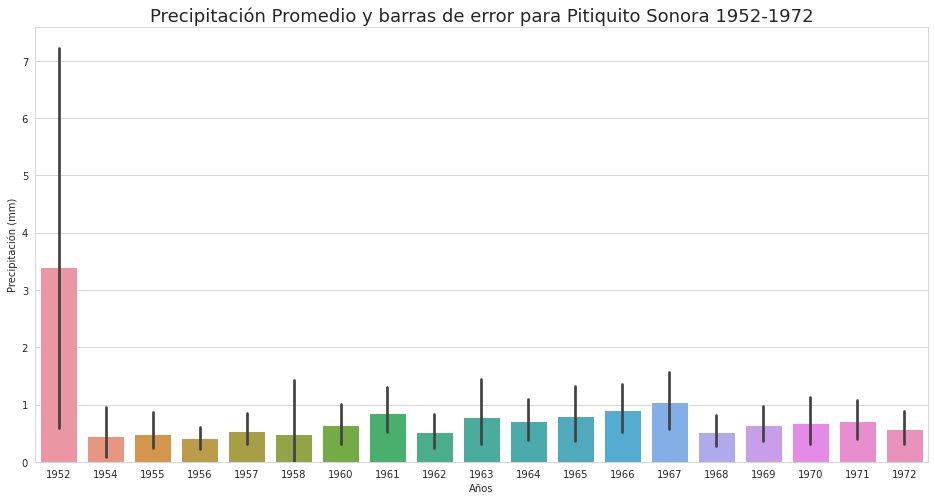

In [28]:
#Ahora realizaremos las gráficas de barras agrupado por años.
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Año', y='Precip', data=df_52);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Pitiquito Sonora 1952-1972', fontsize=18)
plt.show()

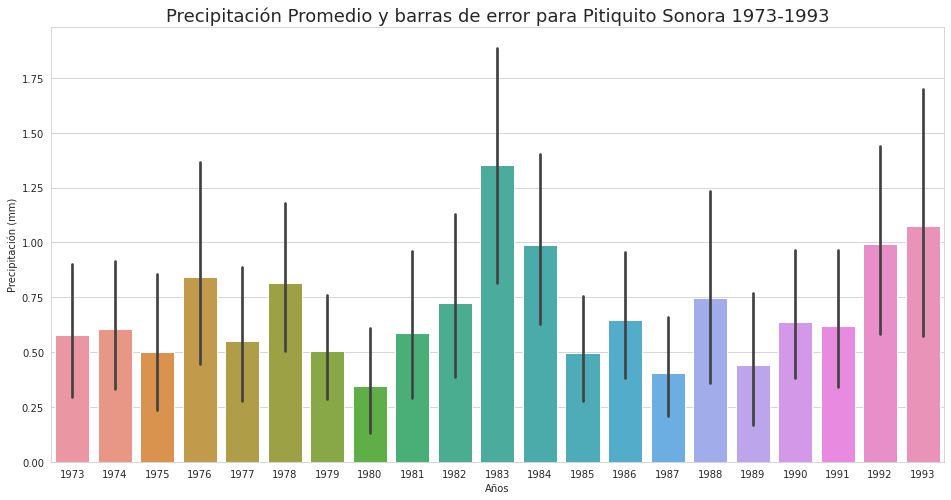

In [30]:
#Ahora realizaremos las gráficas de barras agrupado por años.
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Año', y='Precip', data=df_73);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Pitiquito Sonora 1973-1993', fontsize=18)
plt.show()

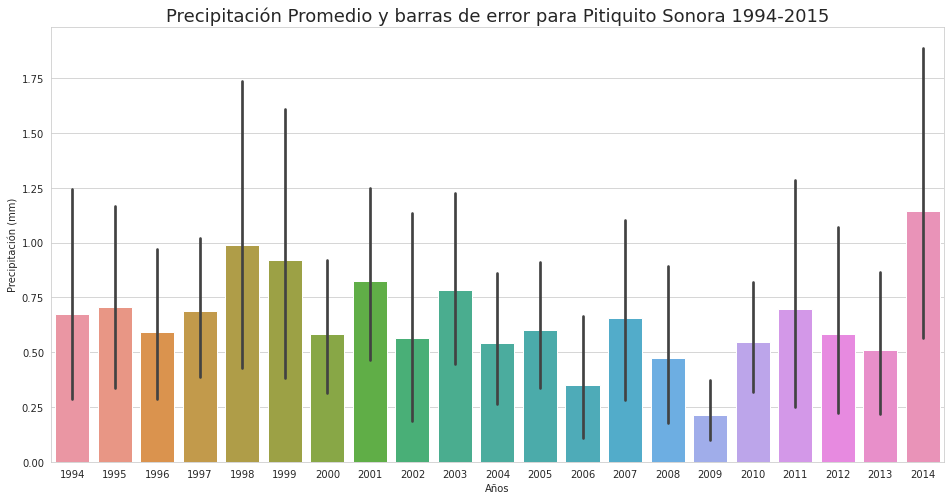

In [31]:
#Ahora realizaremos las gráficas de barras agrupado por años.
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Año', y='Precip', data=df_94);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Pitiquito Sonora 1994-2015', fontsize=18)
plt.show()

**Por mes.**

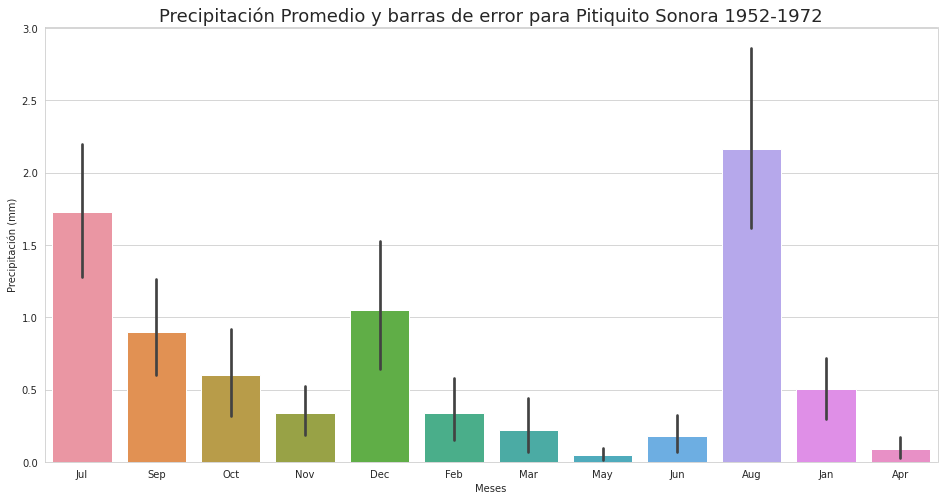

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Mes', y='Precip', data=df_52);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Pitiquito Sonora 1952-1972', fontsize=18)
plt.show()

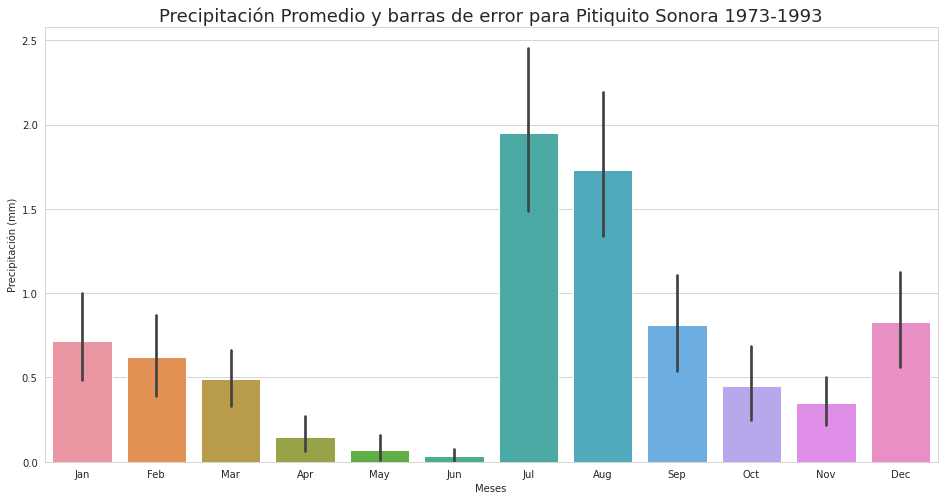

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Mes', y='Precip', data=df_73);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Pitiquito Sonora 1973-1993', fontsize=18)
plt.show()

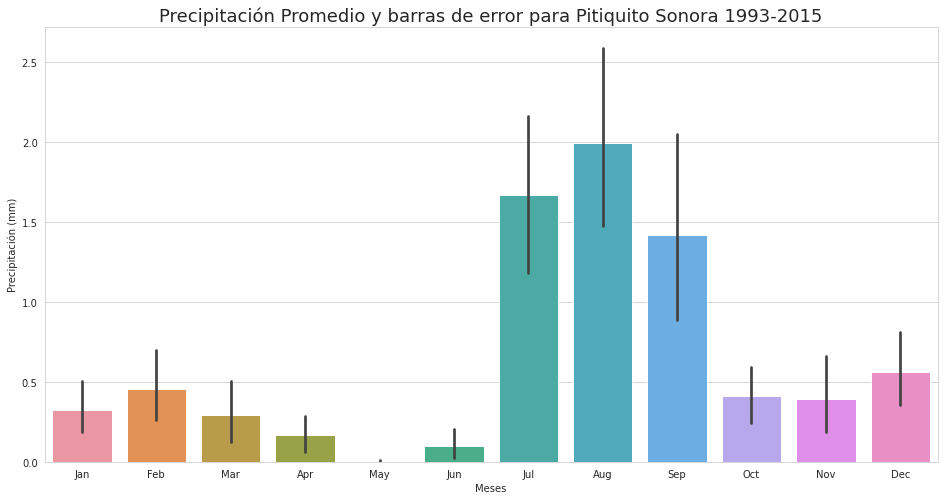

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Mes', y='Precip', data=df_94);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Pitiquito Sonora 1993-2015', fontsize=18)
plt.show()

# **Actividad 5.**
**Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). (Función: sns.lineplot())**

In [36]:
#Definiré aqui, el periodo de años que me servirán para tener la gráfica de los ultimos
#30 años.
df_30 = df_EDA[(df_EDA['Año'] >= 1985) & (df_EDA['Año'] < 2015)] 

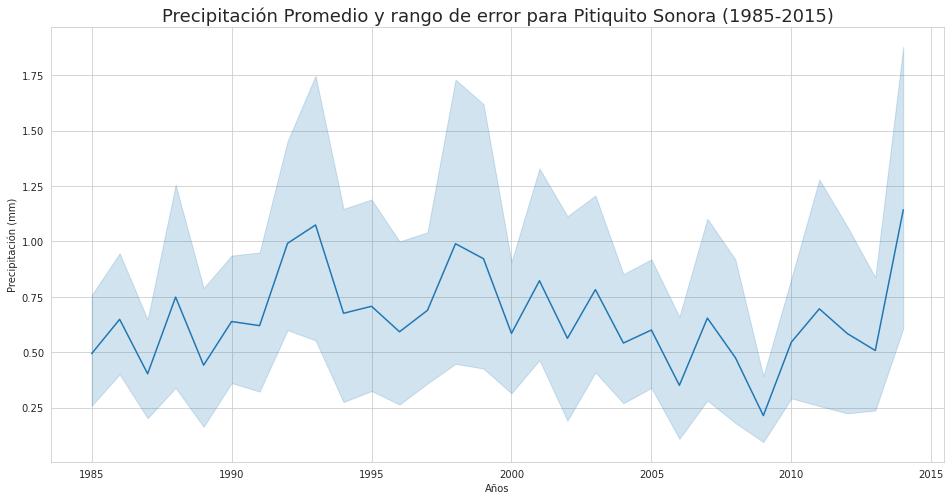

In [37]:
#Utilizamos df_94. Realizamos la gráfica de precipitación.
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='Precip', data=df_30);
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Pitiquito Sonora (1985-2015)', fontsize=18)
plt.show()

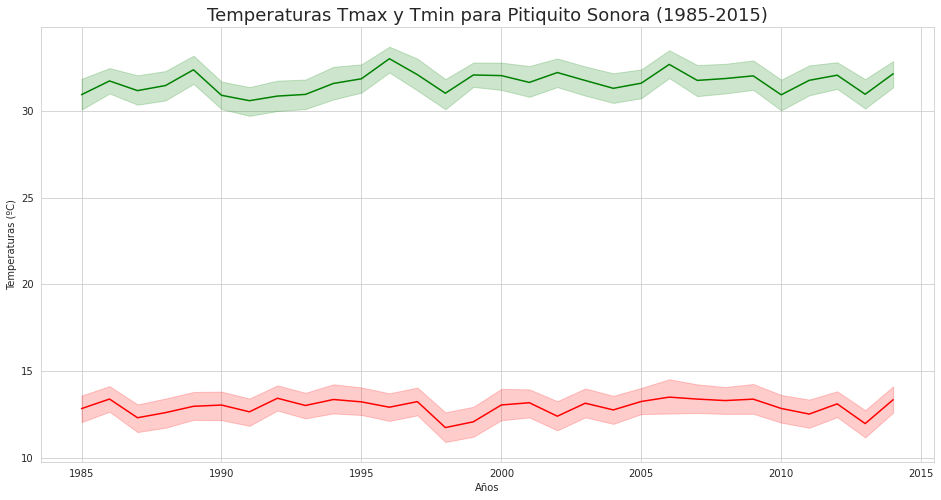

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_30, color='g');
sns.lineplot(x='Año', y='Tmin', data=df_30, color='r');

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Pitiquito Sonora (1985-2015)', fontsize=18)

plt.show()

# **Actividad 6.**
**Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot()) para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.**

**Temperatura máxima.**

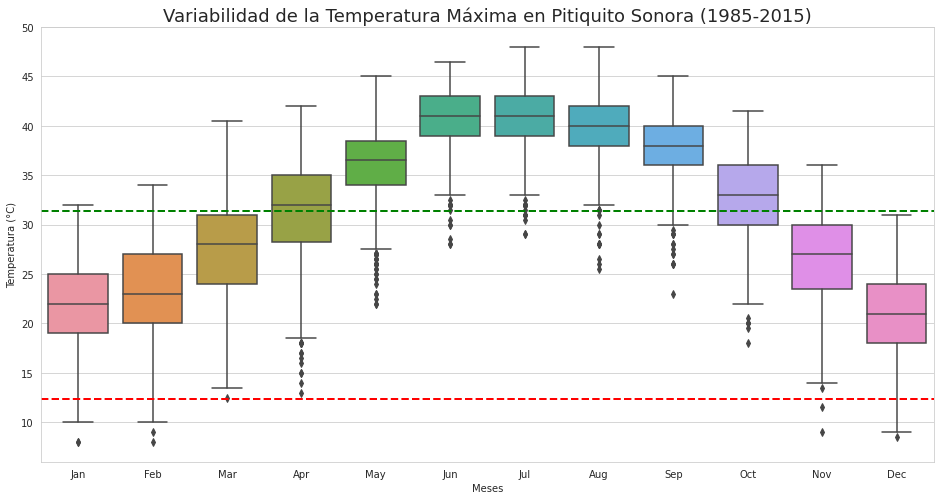

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Declaramos el promedio de ambas temperaturas.
Tmax_p = df_EDA.Tmax.mean()
Tmin_p = df_EDA.Tmin.mean()
#Comenzamos las gráficas de cajas.
g=sns.boxplot(x='Mes', y='Tmax', data=df_30);
#Editamos la gráfica de Tmax.
plt.axhline(Tmax_p, color = 'g', linestyle='--', linewidth=2);
plt.axhline(Tmin_p, color = 'r', linestyle='--', linewidth=2);
plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la Temperatura Máxima en Pitiquito Sonora (1985-2015)', fontsize=18)

plt.show()

In [43]:
#Colocamos la información de ambas temperaturas, para mejor visualización.
print('mean(Tmax) =', Tmax_p)
print('mean(Tmin) =', Tmin_p)
print('Dif Tmax_p-Tmin_p =', (Tmax_p - Tmin_p))

mean(Tmax) = 31.367498141954663
mean(Tmin) = 12.338064935668172
Dif Tmax_p-Tmin_p = 19.02943320628649


**Temperatura Mínima.**

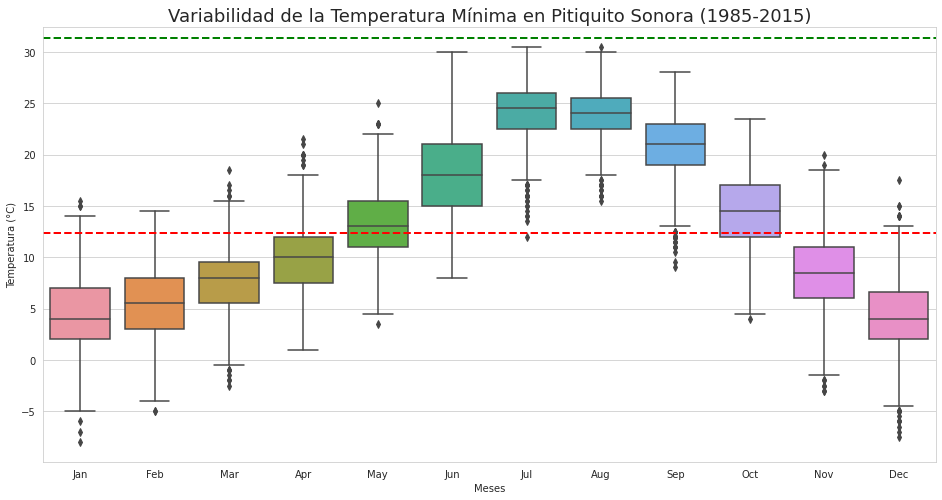

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Declaramos el promedio de ambas temperaturas.
Tmax_p = df_EDA.Tmax.mean()
Tmin_p = df_EDA.Tmin.mean()
#Comenzamos las gráficas de cajas.
g=sns.boxplot(x='Mes', y='Tmin', data=df_30);
#Editamos la gráfica de Tmax.
plt.axhline(Tmax_p, color = 'g', linestyle='--', linewidth=2);
plt.axhline(Tmin_p, color = 'r', linestyle='--', linewidth=2);
plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la Temperatura Mínima en Pitiquito Sonora (1985-2015)', fontsize=18)
plt.show()

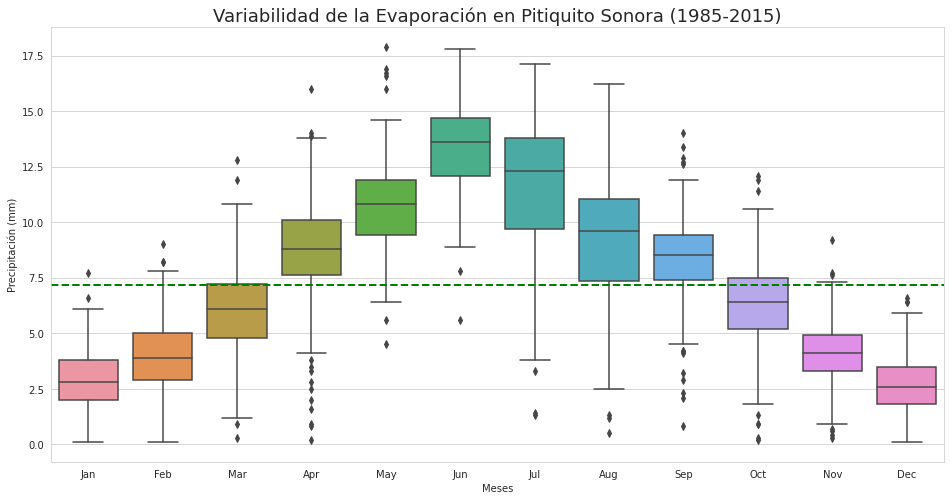

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Declaramos el promedio de ambas temperaturas.
Evap_p = df_EDA.Evap.mean()
#Comenzamos las gráficas de cajas.
g=sns.boxplot(x='Mes', y='Evap', data=df_30);
#Editamos la gráfica de Tmax.
plt.axhline(Evap_p, color = 'g', linestyle='--', linewidth=2);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Variabilidad de la Evaporación en Pitiquito Sonora (1985-2015)', fontsize=18)
plt.show()